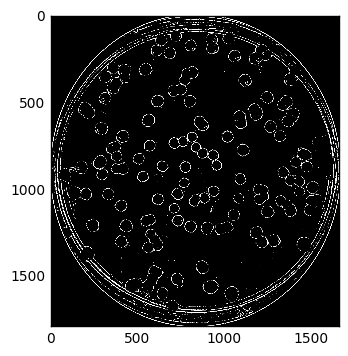

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('Lid UP cropped.png')
b, g, r = cv2.split(img)
rgb_img = cv2.merge([r, g, b])

rgb_img = cv2.medianBlur(rgb_img, 9)
gimg = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gimg, 165,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV,11,2)

plt.imshow(thresh, cmap='gray')

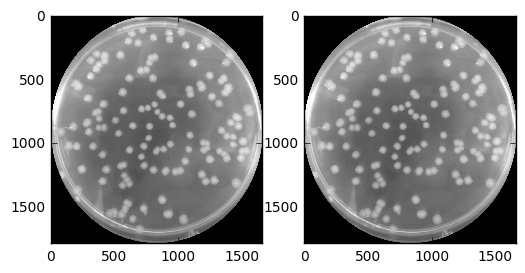

254 0


In [2]:
fig1 = plt.figure()
fig2 = plt.figure()
63
copy_gimg = np.asarray(gimg)
dst = np.zeros(shape=(len(gimg), len(gimg[0])))

b = cv2.normalize(copy_gimg, dst, alpha=140, beta=150, 
                           norm_type=cv2.NORM_MINMAX, 
                           dtype=cv2.CV_32F)
ax = fig1.add_subplot(121)
ax.imshow(gimg, cmap='gray')

ax = fig1.add_subplot(122)
ax.imshow(b, cmap='gray')

plt.show()
print np.max(gimg), np.min(gimg)

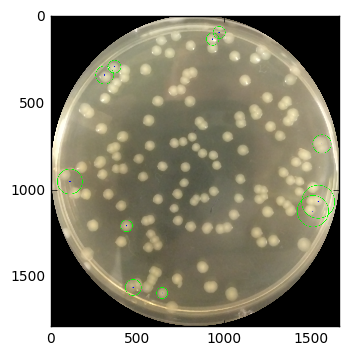

In [3]:
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 
                           1, 20,
                           param1=50, param2=30,
                           minRadius=30, maxRadius=100)

circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    cv2.circle(rgb_img, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(rgb_img, (i[0], i[1]), 2, (0, 0, 255), 3)
    
plt.imshow(rgb_img)